# Plots for arithmetic operations

## plot of addition

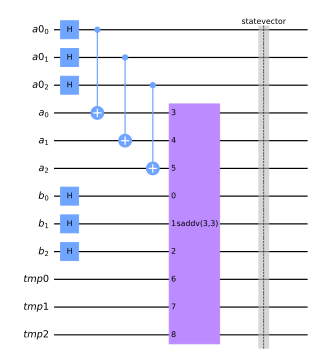

In [2]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

m=3
M=2**m
a0reg = QuantumRegister(m, 'a0')
areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
qc = QuantumCircuit(a0reg, areg, breg)
frame = heap.Frame(qc)

qc.h(a0reg[:m])
qc.h(breg[:m])

for i in range(a0reg.size):
    qc.cx(a0reg[i], areg[i])


sc = ast.new_scope(frame)

a0 = sc.register(a0reg, signed=True)
a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
a += b

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.6)


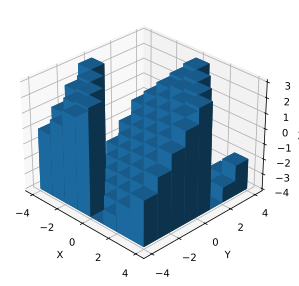

In [3]:
import matplotlib.pyplot as plt
import numpy as np


backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x, y, z, dz) = stv.extract_arithmetic_result_2d_bars(frame, sv, a0, b, a)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=30, azim=-45)
ax.set(xlabel='X',ylabel='Y',zlabel='X+Y')

ax.bar3d(x, y, z, 1, 1, dz, shade=True)
plt.show()

## plot of subtraction

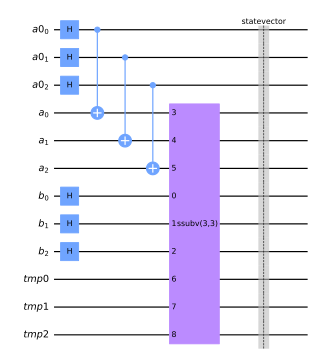

In [4]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

m=3
M=2**m
a0reg = QuantumRegister(m, 'a0')
areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
qc = QuantumCircuit(a0reg, areg, breg)
frame = heap.Frame(qc)

qc.h(a0reg[:m])
qc.h(breg[:m])

for i in range(a0reg.size):
    qc.cx(a0reg[i], areg[i])


sc = ast.new_scope(frame)

a0 = sc.register(a0reg, signed=True)
a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
a -= b

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.6)


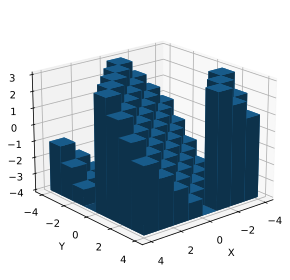

In [5]:
import matplotlib.pyplot as plt
import numpy as np


backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x, y, z, dz) = stv.extract_arithmetic_result_2d_bars(frame, sv, a0, b, a)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=50)
ax.set(xlabel='X',ylabel='Y',zlabel='X-Y')

ax.bar3d(x, y, z, 1, 1, dz, shade=True)
plt.show()

## plot of abs

QuantumRegister(4, 'b')


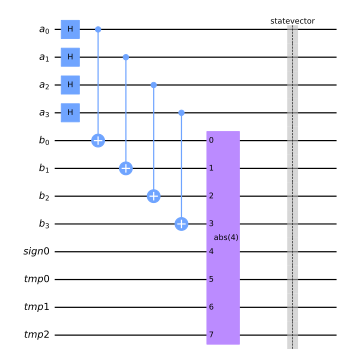

In [6]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

areg = QuantumRegister(4, 'a')
breg = QuantumRegister(4, 'b')
qc = QuantumCircuit(areg, breg)
frame = heap.Frame(qc)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

sc = ast.new_scope(frame)

a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
c = sc.abs(b)

print(c.register)

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.6)


x [0, 1, 2, 3, 4, 5, 6, 7, -1, -2, -3, -4, -5, -6, -7, -8]
y [0, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8]


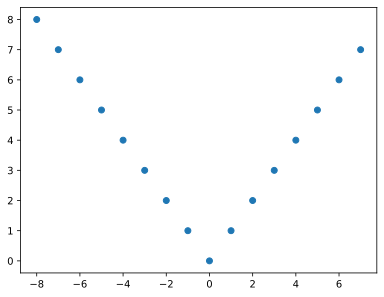

In [7]:
import matplotlib.pyplot as plt
import numpy as np


backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x,y) = stv.extract_arithmetic_result_1d_scatter(frame, sv, a, c)

print("x", x)
print("y", y)
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

## Plot of square

QuantumRegister(8, 'square0')


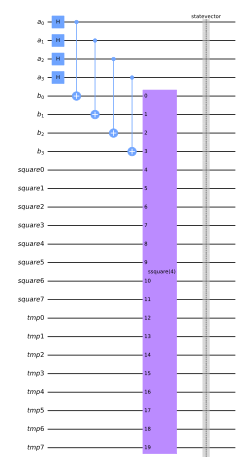

In [8]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

areg = QuantumRegister(4, 'a')
breg = QuantumRegister(4, 'b')
qc = QuantumCircuit(areg, breg)
frame = heap.Frame(qc)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

sc = ast.new_scope(frame)

a = sc.register(areg, signed=True)
b = sc.register(breg, signed=True)
c = sc.square(b)

print(c.register)

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.4)


x [0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, 6, -6, 7, -7, -8]
y [0, 1, 1, 4, 4, 9, 9, 16, 16, 25, 25, 36, 36, 49, 49, 64]


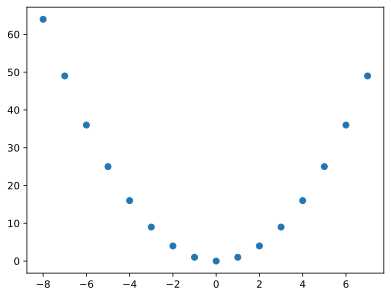

In [9]:
import matplotlib.pyplot as plt
import numpy as np

backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x,y) = stv.extract_arithmetic_result_1d_scatter(frame, sv, a, c)

print("x", x)
print("y", y)
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

## plot of square root

QuantumRegister(3, 'sqrt0')


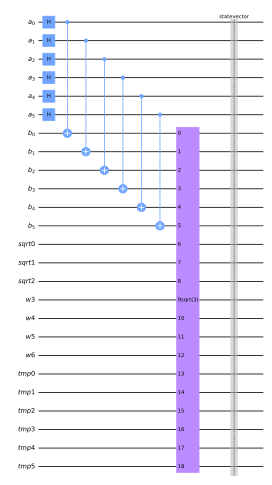

In [10]:
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

import crsq.arithmetic as ari
import crsq.ast as ast
import crsq.statevector as stv
import crsq.heap as heap

m = 6

areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
qc = QuantumCircuit(areg, breg)
frame = heap.Frame(qc)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

sc = ast.new_scope(frame)

a = sc.register(areg, signed=False, fraction_bits=4)
b = sc.register(breg, signed=False, fraction_bits=4)
c = sc.square_root(b)

print(c.register)

sc.build_circuit()

qc.save_statevector()

qc.draw(scale=0.4)


x [0.0, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625, 0.625, 0.6875, 0.75, 0.8125, 0.875, 0.9375, 1.0, 1.0625, 1.125, 1.1875, 1.25, 1.3125, 1.375, 1.4375, 1.5, 1.5625, 1.625, 1.6875, 1.75, 1.8125, 1.875, 1.9375, 2.0, 2.0625, 2.125, 2.1875, 2.25, 2.3125, 2.375, 2.4375, 2.5, 2.5625, 2.625, 2.6875, 2.75, 2.8125, 2.875, 2.9375, 3.0, 3.0625, 3.125, 3.1875, 3.25, 3.3125, 3.375, 3.4375, 3.5, 3.5625, 3.625, 3.6875, 3.75, 3.8125, 3.875, 3.9375]
y [0.0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75]


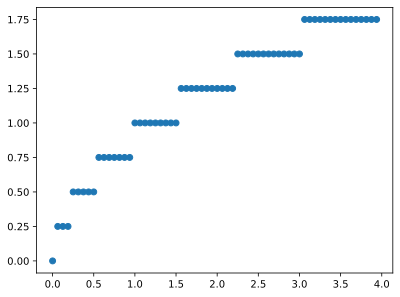

In [11]:
import matplotlib.pyplot as plt
import numpy as np

backend = AerSimulator()
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x,y) = stv.extract_arithmetic_result_1d_scatter(frame, sv, a, c)

print("x", x)
print("y", y)
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

## plot of division (inverse)

QuantumRegister(6, 'qq0')


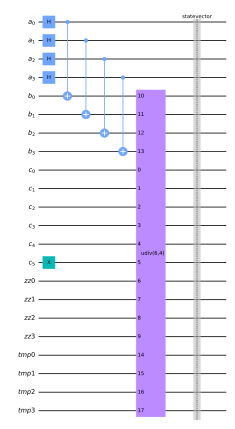

In [12]:
m = 4
areg = QuantumRegister(m, 'a')
breg = QuantumRegister(m, 'b')
creg = QuantumRegister(m+2, 'c')
qc = QuantumCircuit(areg, breg, creg)

qc.h(areg)
for i in range(areg.size):
    qc.cx(areg[i], breg[i])

qc.x(creg[creg.size - 1])

sc = ast.new_scope(qc)

b = sc.register(breg)
c = sc.register(creg, fraction_bits=creg.size-1)
d = c / b

sc.build_circuit()

qc.save_statevector()

print(d.register)

qc.draw(scale=0.4)

x [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
y [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.09375, 0.09375, 0.125, 0.125, 0.15625, 0.1875, 0.25, 0.3125, 0.5, 1.0, 1.90625]


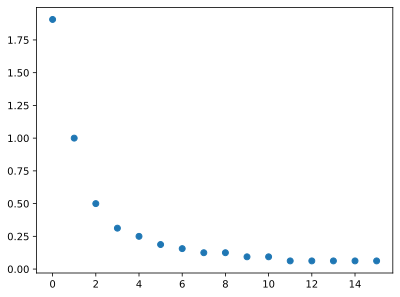

In [13]:
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x,y) = stv.extract_arithmetic_result_1d_scatter(qc, sv, b, d)

print("x", x)
print("y", y)
fig, ax = plt.subplots()

ax.scatter(x,y)

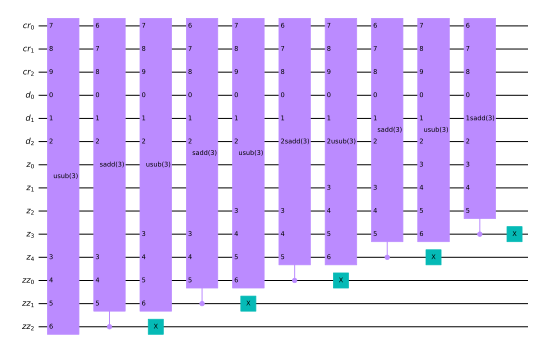

In [14]:
m=5
n=3
z = QuantumRegister(m, 'z')
zz = QuantumRegister(n, 'zz')
d = QuantumRegister(n, 'd')
cr = QuantumRegister(n, 'cr')
qc = QuantumCircuit(cr, d, z, zz)

ari.unsigned_divider(qc, z, zz, d, cr, use_gates=True)
qc.draw(scale=0.5)

QuantumRegister(5, 'qq0')


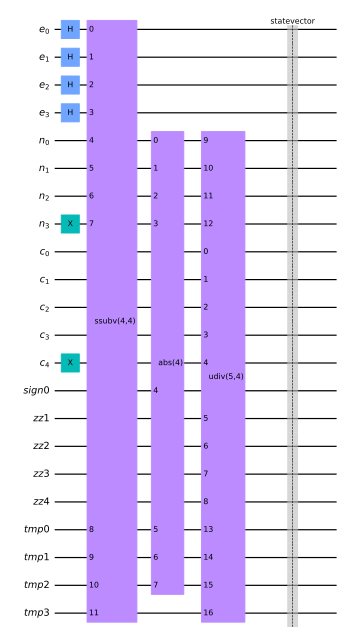

In [15]:
m = 4
ereg = QuantumRegister(m, 'e')
nreg = QuantumRegister(m, 'n')
creg = QuantumRegister(m+1, 'c')
qc = QuantumCircuit(ereg, nreg, creg)

# 電子の位置を動かす
qc.h(ereg)

# 原子核の位置は中央
qc.x(nreg[nreg.size-1])

# 分子は 2^(m+1)
qc.x(creg[creg.size-1])

sc = ast.new_scope(qc)

e_t = sc.register(ereg, fraction_bits=2)
n_t = sc.register(nreg, fraction_bits=2)
c_t = sc.register(creg, fraction_bits=creg.size-1)

n_t -= e_t
adiff_t = sc.abs(n_t)

q_t = c_t / adiff_t

sc.build_circuit()

qc.save_statevector()

print(q_t.register)

qc.draw(scale=0.6)

ex [0.25, 0.5, 0.75, 0.0, 3.75, 3.5, 3.25, 1.0, 1.25, 3.0, 2.75, 1.5, 2.5, 1.75, 2.25, 2.0]
q [0.5, 0.5, 0.75, 0.5, 0.5, 0.5, 0.75, 1.0, 1.25, 1.0, 1.25, 2.0, 2.0, 4.0, 4.0, 7.5]


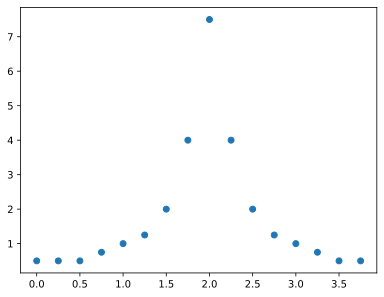

In [16]:
tp = transpile(qc, backend)
result = backend.run(tp).result()

sv = result.get_statevector()
(x,q) = stv.extract_arithmetic_result_1d_scatter(qc, sv, e_t, q_t)
#data *= 2**(-m)

print("ex", x)
print("q", q)
fig, ax = plt.subplots()

ax.scatter(x,q)

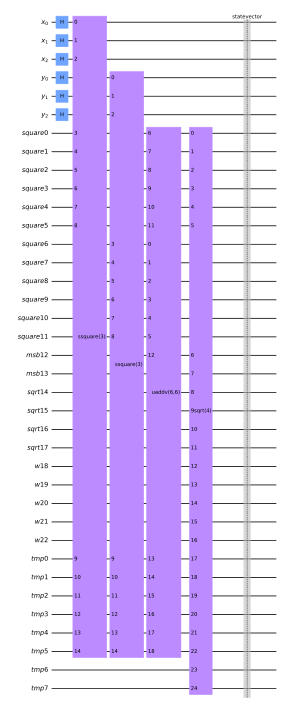

In [17]:
xreg = QuantumRegister(3, "x")
yreg = QuantumRegister(3, "y")
qc = QuantumCircuit(xreg, yreg)
qc.h(xreg)
qc.h(yreg)
scope = ast.new_scope(qc)
x = scope.register(xreg)
y = scope.register(yreg)
xx = scope.square(x)
yy = scope.square(y)
xx += yy
r = scope.square_root(xx)
scope.build_circuit()
qc.save_statevector()
qc.draw(scale=0.4)

# mps = AerSimulator(method='matrix_product_state')
# tp = transpile(qc, mps)
# result = mps.run(tp).result()

# sv = result.get_statevector()
